<a href="https://colab.research.google.com/github/MamadouBousso/IAProjects/blob/master/ProjetFinalAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projet final algorithmique
### Objectifs
* Decouvrir les librairies pandas, networkx, folium
* Comprendre les ADT et implementer une File, une Pile
https://en.wikipedia.org/wiki/Abstract_data_type
* Comprendre les methodes de parcours de graphe
* BFS ou parcours en largeur https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_largeur
* DFS ou parcours en profondeur
https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_profondeur
* Comprendre les heuristiques de search en IA
https://online-learning.harvard.edu/course/cs50s-introduction-artificial-intelligence-python

### Partie 1
* Decouvrir les librairies pandas, networkx, folium

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv

%matplotlib inline

In [8]:
data = '/content/drive/My Drive/Colab Notebooks/ProjetMasterALgo/ProjetGraph/data'

### Lire le fichier de graphe avec pandas en utilisant read_csv
* Documentation sur pandas: http://www.python-simple.com/python-pandas/dataframes-indexation.php

In [11]:
transport_nodes = pd.read_csv(data+'/transport-nodes.csv')

In [ ]:
transport_nodes

,id,latitude,longitude,population
0,Amsterdam,52.379189,4.899431,821752
1,Utrecht,52.092876,5.104480,334176
2,Den Haag,52.078663,4.288788,514861
3,Immingham,53.612390,-0.222190,9642
4,Doncaster,53.522850,-1.131160,302400
5,Hoek van Holland,51.977500,4.133330,9382
6,Felixstowe,51.963750,1.351100,23689
7,Ipswich,52.059170,1.155450,133384
8,Colchester,51.889210,0.904210,104390
9,London,51.509865,-0.118092,8787892


In [12]:
transport_arcs = pd.read_csv(data+'/transport-relationships.csv')

In [ ]:
transport_arcs

,src,dst,relationship,cost
0,Amsterdam,Utrecht,EROAD,46
1,Amsterdam,Den Haag,EROAD,59
2,Den Haag,Rotterdam,EROAD,26
3,Amsterdam,Immingham,EROAD,369
4,Immingham,Doncaster,EROAD,74
5,Doncaster,London,EROAD,277
6,Hoek van Holland,Den Haag,EROAD,27
7,Felixstowe,Hoek van Holland,EROAD,207
8,Ipswich,Felixstowe,EROAD,22
9,Colchester,Ipswich,EROAD,32


### Construire le graphe et le visualiser avec networkx avec la fonction from_pandas_dataframe de networkx
https://networkx.github.io/

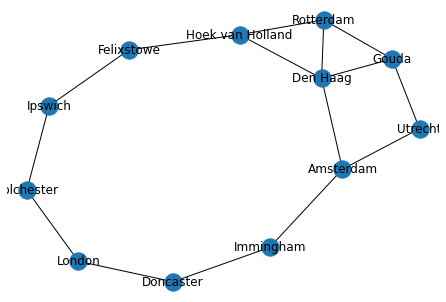

In [14]:
#Graphe = nx.from_pandas_dataframe(transport_arcs, 'src', 'dst', ['relationship', 'cost'])
# Build your graph
Graphe = nx.from_pandas_edgelist(transport_arcs, 'src', 'dst',['relationship', 'cost'])

# Plot it
nx.draw(Graphe, with_labels=True)
plt.show()

In [15]:
Graphe

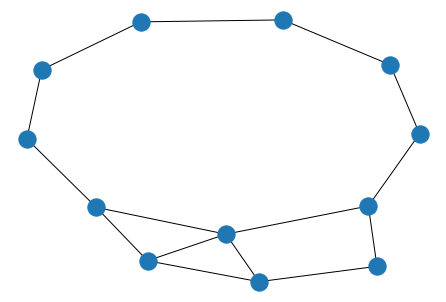

In [16]:
nx.draw(Graphe)


### Ajouter des attributs longitude et latitude aux noeuds avec Networkx en utilisant:
* le dictionnaire "node" de networkx qui contient les noeuds
* le dataframe transportnode defini plus haut
* Des exemples d'utilisation de la fonction set_node_attributes
https://www.programcreek.com/python/example/89530/networkx.set_node_attributes

In [18]:
Graphe.nodes

NodeView(('Amsterdam', 'Utrecht', 'Den Haag', 'Rotterdam', 'Immingham', 'Doncaster', 'London', 'Hoek van Holland', 'Felixstowe', 'Ipswich', 'Colchester', 'Gouda'))

In [19]:
def ajouterAttribut(myGraphe,dfnoeuds, nomAttribut,nomIndex):
    nx.set_node_attributes(myGraphe, name= nomAttribut, values = dfnoeuds.set_index(nomIndex)[nomAttribut].to_dict())

In [20]:
ajouterAttribut(Graphe,transport_nodes,'latitude','id')
ajouterAttribut(Graphe,transport_nodes,'longitude','id')
ajouterAttribut(Graphe,transport_nodes,'population','id')

In [22]:
Graphe.nodes

NodeView(('Amsterdam', 'Utrecht', 'Den Haag', 'Rotterdam', 'Immingham', 'Doncaster', 'London', 'Hoek van Holland', 'Felixstowe', 'Ipswich', 'Colchester', 'Gouda'))

In [24]:
Graphe.edges

EdgeView([('Amsterdam', 'Utrecht'), ('Amsterdam', 'Den Haag'), ('Amsterdam', 'Immingham'), ('Utrecht', 'Gouda'), ('Den Haag', 'Rotterdam'), ('Den Haag', 'Hoek van Holland'), ('Den Haag', 'Gouda'), ('Rotterdam', 'Gouda'), ('Rotterdam', 'Hoek van Holland'), ('Immingham', 'Doncaster'), ('Doncaster', 'London'), ('London', 'Colchester'), ('Hoek van Holland', 'Felixstowe'), ('Felixstowe', 'Ipswich'), ('Ipswich', 'Colchester')])

### Representer les noeuds sur une carte avec Folium

In [25]:
import folium
basemap = folium.Map(
    location=[52.3791890, 4.899431],
    zoom_start=12,
    tiles='Stamen Toner'
)


In [26]:
basemap

### Ajouter des marqueurs pour tous les noeuds du reseau avec folium.Marker

In [30]:
for i in Graphe.nodes:
    folium.Marker([Graphe.nodes[i]['latitude'],Graphe.nodes[i]['longitude']],tooltip = 'Population '+str(Graphe.nodes[i]['longitude'])).add_to(basemap)

In [ ]:
basemap

In [33]:
'''
Cette fonction permet de construire une liste de liste comprenant pour chaque
sous-liste ses coordonnées et celles d'un voisin
Ces points peuvent etre utilisés pour représenter les lignes dans la carte
'''
def construirePointsImage(myGraphe):
    points = []
    for i in myGraphe.nodes:
        
        for neighbor in myGraphe.neighbors(i):
            S = []
            S.append([myGraphe.nodes[i]["latitude"],myGraphe.nodes[i]["longitude"]])
            S.append([myGraphe.nodes[neighbor]["latitude"],myGraphe.nodes[neighbor]["longitude"]])
            points.append(S)
    return points
        


In [34]:
coordonneesvoisins = construirePointsImage(Graphe)

In [37]:
'''
A faire
Permet de visualiser une carte du graphe avec ses noeuds et les arcs sous forme lignes
Prend en entrée:
- un graphe
- les coordonnées entre chaque point et ses voisins calculées avec la fonction ci-dessus
- Une location par defaut
- Un paramétrage de folium
'''
        
def visualiserFolium(myGraphe, points, locationpardefaut = [52.3791890, 4.899431],tiles='Stamen Toner' ):
    
    basemap = folium.Map(location= locationpardefaut,zoom_start=6,tiles=tiles)
    
    for i in Graphe.nodes:
        folium.Marker([Graphe.nodes[i]['latitude'],Graphe.nodes[i]['longitude']],tooltip = 'Population '+str(Graphe.nodes[i]['longitude'])).add_to(basemap)
    
    folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(basemap)

    return basemap

In [38]:
visualiserFolium(Graphe,coordonneesvoisins)

### Partie 2
* Dans cette partie vous allez implémenter des ADT: Noeud, Graphe, File, Pile



#### Implementer la classe Noeud
* Un noeud a un nom
* Un noeud a des attributs sous forme de dictionnaire pyton avec comme cle:
    une liste de coordonnes ( latitude, longitude)
    
    la taille de la population
* La liste des voisins sera initialisée à la création des arcs dans le graphe 
*  Vous ajouterez toutes les methodes nécessaires 
        
    
        

In [39]:
class Noeud:
    def __init__(self,name):
        self.name = name
        self.attributs = {}
        self.listeNomVoisin = []
        
    def setAttribut(self,key, values):
        self.attributs[key] = values
        
    def getAttribut(self,key):
        return self.attributs[key]
    
    def getName(self):
        return self.name
    '''
    Deux noeuds sont egaux s'ils ont même name
    '''
    def egal(self, noeud):
        return self.name == noeud.name

#### Implementer la classe Graphe
* Les noeuds des graphes doivent être initialisé à l'aide du fichier 
transport-node.csv ( vous n'utiliserez plus pandas). Vous initiliserez aussi les attributs
* Les arcs des graphes doivent être initialisé à l'aide du fichier 
transport-relations.csv ( vous n'utiliserez plus pandas). Vous initiliserez aussi les attributs
* On doit pouvoir retrouver les coordonnées d'un noeud grâce à son nom
* On doit avoir la liste des noeuds voisins d'un noeud donné. Le graphe est non orienté donc le voisinage est reciproque
        

In [40]:
class Graphe:
    def __init__(self):
        self.noeuds = []
        self.arcs = {}
    '''
    Creer les neouds avec le fichier transport-node.csv
    On peut mettre tous les noeuds dans une liste
    '''    
    def creerNoeuds(self,fichiernoeuds):
        

        with open(fichiernoeuds) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0
            for row in csv_reader:
                if line_count == 0:
                    print(f'Column names are {", ".join(row)}')
                    line_count += 1
                else:
                    N = Noeud(row[0])
                    N.setAttribut('coordonnees',[float(row[1]),float(row[2])])
                    N.setAttribut('population',int(row[3]))
                    self.noeuds.append(N)
                    self.arcs.update({N.name:[]})
                    line_count += 1
            print(f'Processed {line_count} lines.')
    '''
    - Creer les neouds avec le fichier transport-node.csv
    - Utilisez un dictionnaire pour les arcs
    - N'oubliez pas que le graphe est non oriente.
    - Il faudra initialiser la liste des voisins pour chaque noeud
    '''   
    def creerArc(self, fichierarcs):
        with open(fichierarcs) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            line_count = 0
            for row in csv_reader:
                if line_count == 0:
                    print(f'Column names are {", ".join(row)}')
                    line_count += 1
                else:
                    self.arcs[row[0]].append((row[1],row[3]))
                    
                    line_count += 1
            print(f'Processed {line_count} lines.')
    '''
    Retrouver un noeud à partir de son nom
    '''   
    def getNoeud(self,name):
        
        for n in self.noeuds:
            if n.name == name:
                return n
        raise Exception("name not exist")
    '''
    Trouver les noeuds voisins d'un noeud donne
    '''
    def getVoisins(self,noeud):
        return self.arcs[noeud.name]
    
    '''
    Recuperer pour un noeud donne les latitudes et longitudes de ses voisins
    Constituer des pairs de listes de coordonnées entre le point et ses voisins
    pour une representation sous folium
    
    '''
    def getCoordonnesVoisins(self, noeud):
        listecoord = []
        # voise est un tuple et je veux recuperer le nom du noeud voisin 
        # qui est le premier lement du tuple
        
        for voise in self.getVoisins(noeud):
            # Recupere un noeud voisin
            noeudVoisin = self.getNoeud(voise[0])
            listecoord.append([noeud.getAttribut('coordonnees'),noeudVoisin.getAttribut('coordonnees')])
        return listecoord
    
    '''
    Recuperer les coordonnees d'une liste de neouds pour visualiser sous folium
    Prend en entrée une liste de nom de noeud
    Retourne une liste de sous-listes à deux elements de coordonnées
    '''
    def getListeCoordonnees(self,listeNoeuds):
        coord = []
        for name in listeNoeuds:
            coord.append(self.getNoeud(name).getAttribut('coordonnees'))
        return coord
    
    '''
    Visualiser les noeuds et les arcs sous folium
    '''
    
    def visualiserFolium(self, locationpardefaut = [52.3791890, 4.899431],tiles='Stamen Toner',explored = None ):
    
        basemap = folium.Map(location= locationpardefaut,zoom_start=6,tiles=tiles)
        
        
        
        for i in self.noeuds:
            
            folium.Marker(i.getAttribut('coordonnees'),tooltip = 'Population '+str(i.getAttribut('population'))).add_to(basemap)
            locations = self.getCoordonnesVoisins(i)
            if len(locations)!= 0:
                folium.PolyLine(self.getCoordonnesVoisins(i), color="red", weight=2.5, opacity=1).add_to(basemap)
        if explored != None:
            folium.PolyLine(self.getListeCoordonnees(explored), color="green", weight=2.5, opacity=1).add_to(basemap)
        return basemap

In [42]:
G = Graphe()
G.creerNoeuds(data+'/transport-nodes.csv')

Column names are id, latitude, longitude, population
Processed 13 lines.


In [43]:
G.creerArc(data +'/transport-relationships.csv')

Column names are src, dst, relationship, cost
Processed 16 lines.


In [44]:
G.visualiserFolium()

### Partie 3
* Implementer les classes File et Pile en utilisant les list en python
* Quelques liens interessants:
https://openclassrooms.com/fr/courses/900279-apprenez-a-programmer-avec-ada/2144666-les-types-abstraits-de-donnees-listes-files-piles

https://fr.wikipedia.org/wiki/Type_abstrait

http://www.csi.uottawa.ca/~flocchin/CSI2510/CSI2510PileFile.pdf



In [45]:


class Pile():
    '''
    Classe Pile: voir les definitions ci-dessous
    La classe dispose d'une structure de type list pour ranger les données
    Les consultations, les insertions, les suppressions se font du même cote
    Dernier arrive premier servi : LIFO
    '''
    def __init__(self):
        self.elements = []
    '''
    Insere un objet en tete de la pile
    '''
    def push(self,noeud):
        self.elements.append(noeud)
    '''
    Retourne True si  un noeud est dans la pile
    '''
    
    def contains_noeud(self, name):
        
        for noeud in self.elements:
            if noeud.name == name:
                return True
        return False
                
    '''
    Retourne true si la pile est vide
    '''
    def empty(self):
        return len(self.elements) == 0
    '''
    Retourne et supprime l'element en tete de pile
    Retourne une exception si la pile est vide
    '''
    def remove(self):
        if self.empty():
            raise Exception("Pile vide")
        else:
            noeud = self.elements[-1]
            self.elements = self.elements[:-1]
            return noeud





In [46]:

class File(Pile):
    '''
    Classe File: voir les definitions ci-dessous
    La classe dispose d'une structure de type list pour ranger les données
    Les éléments sont enfilés (insérés) du coté arrière et défilés (retirés)
    du coté avant
    Premier arrive premier servi : FIFO
    File et Pile peuvent partager certaines methodes donc utilisez l'heritage pour definir
    la classe File. 
    Normalement vous ne devez changer l'implementation d'une seule methode
    '''

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            noeud = self.elements[0]
            self.elements = self.elements[1:]
            return noeud

### Partie 3
* Implementer les algorithmes de parcours de graphe: BFS ET DFS
* Algorithme BFS et DFS
https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_largeur
https://fr.wikipedia.org/wiki/Algorithme_de_parcours_en_profondeur
Les deux parcours utilisent le même algorithme mais différent suivant la structure de données utilisée comme frontiére. La frontiére est une structure de données qui permet manipuler les noeuds intermediaires. 
#### Algorithme
* On met le noeud source dans la frontiére
* On cree une structure vide devant contenir les noeuds explorés
* Repeter
    * Si la frontiere est vide pas de solution
    * Prendre un noeud dans la frontiere ( idée de suppression)
    * Si le noeud est le noeud destination alors solution
    * Sinon:
        * Mettre le noeud dans l'ensemble des noeuds deja explorés
        * Ajouter les voisins dans la frontiére s'ils ne sont pas dans la frontiere et s'ils ne sont pas deja explores



In [47]:
'''
Implémenter le parcours en profondeur non recursif entre deux noeuds
'''

def parcoursDFS(myGraphe,noeudSRC,noeudDST):
        """Trouver un parcours DFS entre noeudSRC et noeudDST"""

        # Keep track of number of states explored
        num_explored = 0

        # Initialize frontier to just the starting position
        #start = Node(state=self.start, parent=None, action=None)
        frontiere = Pile()
        frontiere.push(noeudSRC)

        # Initialize an empty explored set
        explored = set()

        # Keep looping until solution found
        while True:

            # If nothing left in frontier, then no path
            if frontiere.empty():
                raise Exception("no solution")

            # Choose a node from the frontier
            node = frontiere.remove()
            num_explored += 1

            # If node is the goal, then we have a solution
            if node.egal(noeudDST):
                
                
                explored.add(noeudDST.name)
                return explored, num_explored

            # Mark node as explored
            explored.add(node.name)

            # Add neighbors to frontier
            for n in myGraphe.getVoisins(node):
                
                if not frontiere.contains_noeud(n[0]) and n[0] not in explored:
                    
                    frontiere.push(myGraphe.getNoeud(n[0]))



In [48]:
G.visualiserFolium(explored = list(parcoursDFS(G,G.noeuds[0],G.noeuds[1])[0]))

In [ ]:
#### Exercice: Implementer le parcours en profondeur recursif

In [49]:
'''
Implémenter le parcours en profondeur non recursif entre deux noeuds
'''

def parcoursBFS(myGraphe,noeudSRC,noeudDST):
        """Trouver un parcours DFS entre noeudSRC et noeudDST"""

        # Keep track of number of states explored
        num_explored = 0

        # Initialize frontier to just the starting position
        #start = Node(state=self.start, parent=None, action=None)
        frontiere = File()
        frontiere.push(noeudSRC)

        # Initialize an empty explored set
        explored = set()

        # Keep looping until solution found
        while True:

            # If nothing left in frontier, then no path
            if frontiere.empty():
                raise Exception("no solution")

            # Choose a node from the frontier
            node = frontiere.remove()
            num_explored += 1

            # If node is the goal, then we have a solution
            if node.egal(noeudDST):
                
                
                explored.add(noeudDST.name)
                return explored, num_explored

            # Mark node as explored
            explored.add(node.name)

            # Add neighbors to frontier
            for n in myGraphe.getVoisins(node):
                
                if not frontiere.contains_noeud(n[0]) and n[0] not in explored:
                    
                    frontiere.push(myGraphe.getNoeud(n[0]))



In [50]:
G.visualiserFolium(explored = list(parcoursBFS(G,G.noeuds[0],G.noeuds[1])[0]))

### Partie 4
* Implementer les algorithmes A star où le choix se portera sur le voisin ayant le plus petit coût

